## Interpolate input weather data to dt = 0.5 to match amr wind dt ##

In [2]:
# Most recently tested against PySAM 4.2.0

import pandas as pd
import json
import numpy as np
import PySAM.Pvwattsv7 as pvwatts
import matplotlib.pyplot as plt

### Read sample data

In [33]:
data = pd.read_csv("NonAnnualSimulation-sample_data.csv")
data["Timestamp"] = pd.DatetimeIndex(pd.to_datetime(data["Timestamp"], utc=True))
data = data.set_index("Timestamp")
data = data[data.index > '2018-05-10 12:30:00+0000'] # select only after 10am UTC

In [34]:
data.head()

SRRL BMS Wind Speed at 19' (m/s)  \
Timestamp                                                     
2018-05-10 12:31:00+00:00                          0.440000   
2018-05-10 12:32:00+00:00                          0.930001   
2018-05-10 12:33:00+00:00                          1.025001   
2018-05-10 12:34:00+00:00                          0.520000   
2018-05-10 12:35:00+00:00                          1.008001   

                           SRRL BMS Direct Normal Irradiance (W/m²_irr)  \
Timestamp                                                                 
2018-05-10 12:31:00+00:00                                    330.860199   
2018-05-10 12:32:00+00:00                                    371.161713   
2018-05-10 12:33:00+00:00                                    393.394104   
2018-05-10 12:34:00+00:00                                    400.198608   
2018-05-10 12:35:00+00:00                                    415.563202   

                           SRRL BMS Wind Speed at 6' (m/s)  \
Timestamp                                                    
2018-05-10 12:31:00+00:00                         0.285000   
2018-05-10 12:32:00+00:00                         0.103000   
2018-05-10 12:33:00+00:00                         0.000000   
2018-05-10 12:34:00+00:00                         0.095000   
2018-05-10 12:35:00+00:00                         0.938001   

                           SRRL BMS Global Horizontal Irradiance (W/m²_irr)  \
Timestamp                                                                     
2018-05-10 12:31:00+00:00                                         68.230377   
2018-05-10 12:32:00+00:00                                         75.055397   
2018-05-10 12:33:00+00:00                                         78.681480   
2018-05-10 12:34:00+00:00                                         81.421562   
2018-05-10 12:35:00+00:00                                         85.125893   

                           SRRL BMS Peak Wind Speed at 6' (m/s)  \
Timestamp                                                         
2018-05-10 12:31:00+00:00                              1.450001   
2018-05-10 12:32:00+00:00                              0.700000   
2018-05-10 12:33:00+00:00                              0.000000   
2018-05-10 12:34:00+00:00                              0.950001   
2018-05-10 12:35:00+00:00                              1.200001   

                           SRRL BMS Peak Wind Speed at 19' (m/s)  \
Timestamp                                                          
2018-05-10 12:31:00+00:00                               0.950001   
2018-05-10 12:32:00+00:00                               1.450001   
2018-05-10 12:33:00+00:00                               1.200001   
2018-05-10 12:34:00+00:00                               1.200001   
2018-05-10 12:35:00+00:00                               1.700001   

                           SRRL BMS Dry Bulb Temperature (°C)  \
Timestamp                                                       
2018-05-10 12:31:00+00:00                           11.990000   
2018-05-10 12:32:00+00:00                           11.980000   
2018-05-10 12:33:00+00:00                           11.960000   
2018-05-10 12:34:00+00:00                           11.879999   
2018-05-10 12:35:00+00:00                           11.820001   

                           SRRL BMS Opaque Cloud Cover (%)  \
Timestamp                                                    
2018-05-10 12:31:00+00:00                              7.0   
2018-05-10 12:32:00+00:00                              6.0   
2018-05-10 12:33:00+00:00                              8.0   
2018-05-10 12:34:00+00:00                              8.0   
2018-05-10 12:35:00+00:00                              9.0   

                           SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr)  \
Timestamp                                                                      
2018-05-10 12:31:00+00:00                                          32.57

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 810 entries, 2018-05-10 00:00:00+00:00 to 2018-05-10 23:59:00+00:00
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   SRRL BMS Wind Speed at 19' (m/s)                   810 non-null    float64
 1   SRRL BMS Direct Normal Irradiance (W/m²_irr)       810 non-null    float64
 2   SRRL BMS Wind Speed at 6' (m/s)                    810 non-null    float64
 3   SRRL BMS Global Horizontal Irradiance (W/m²_irr)   810 non-null    float64
 4   SRRL BMS Peak Wind Speed at 6' (m/s)               810 non-null    float64
 5   SRRL BMS Peak Wind Speed at 19' (m/s)              810 non-null    float64
 6   SRRL BMS Dry Bulb Temperature (°C)                 810 non-null    float64
 7   SRRL BMS Opaque Cloud Cover (%)                    810 non-null    float64
 8   SRRL BMS Diffuse Horizontal Irradiance (W

In [35]:
data_resampled = data.resample('0.5S').asfreq()
data_resampled_filled = data_resampled.interpolate()
data_resampled_filled.head()

SRRL BMS Wind Speed at 19' (m/s)  \
Timestamp                                                            
2018-05-10 12:31:00+00:00                                 0.440000   
2018-05-10 12:31:00.500000+00:00                          0.444084   
2018-05-10 12:31:01+00:00                                 0.448167   
2018-05-10 12:31:01.500000+00:00                          0.452250   
2018-05-10 12:31:02+00:00                                 0.456334   

                                  SRRL BMS Direct Normal Irradiance (W/m²_irr)  \
Timestamp                                                                        
2018-05-10 12:31:00+00:00                                           330.860199   
2018-05-10 12:31:00.500000+00:00                                    331.196045   
2018-05-10 12:31:01+00:00                                           331.531891   
2018-05-10 12:31:01.500000+00:00                                    331.867737   
2018-05-10 12:31:02+00:00                                           332.203583   

                                  SRRL BMS Wind Speed at 6' (m/s)  \
Timestamp                                                           
2018-05-10 12:31:00+00:00                                0.285000   
2018-05-10 12:31:00.500000+00:00                         0.283484   
2018-05-10 12:31:01+00:00                                0.281967   
2018-05-10 12:31:01.500000+00:00                         0.280450   
2018-05-10 12:31:02+00:00                                0.278934   

                                  SRRL BMS Global Horizontal Irradiance (W/m²_irr)  \
Timestamp                                                                            
2018-05-10 12:31:00+00:00                                                68.230377   
2018-05-10 12:31:00.500000+00:00                                         68.287252   
2018-05-10 12:31:01+00:00                                                68.344128   
2018-05-10 12:31:01.500000+00:00                                         68.401003   
2018-05-10 12:31:02+00:00                                                68.457878   

                                  SRRL BMS Peak Wind Speed at 6' (m/s)  \
Timestamp                                                                
2018-05-10 12:31:00+00:00                                     1.450001   
2018-05-10 12:31:00.500000+00:00                              1.443751   
2018-05-10 12:31:01+00:00                                     1.437501   
2018-05-10 12:31:01.500000+00:00                              1.431251   
2018-05-10 12:31:02+00:00                                     1.425001   

                                  SRRL BMS Peak Wind Speed at 19' (m/s)  \
Timestamp                                                                 
2018-05-10 12:31:00+00:00                                      0.950001   
2018-05-10 12:31:00.500000+00:00                               0.954167   
2018-05-10 12:31:01+00:00                                      0.958334   
2018-05-10 12:31:01.500000+00:00                               0.962501   
2018-05-10 12:31:02+00:00                                      0.966667   

                                  SRRL BMS Dry Bulb Temperature (°C)  \
Timestamp                                                              
2018-05-10 12:31:00+00:00                                  11.990000   
2018-05-10 12:31:00.500000+00:00                           11.989917   
2018-05-10 12:31:01+00:00                                  11.989834   
2018-05-10 12:31:01.500000+00:00                           11.989750   
2018-05-10 12:31:02+00:00                                  11.989667   

                                  SRRL BMS Opaque Cloud Cover (%)  \
Timestamp                                                           
2018-05-10 12:31:00+00:00                                7.000000   
2018-05-10 12:31:00.500000+00:00                         6.991667   
2018-05-10 12:31:01+00:00                              

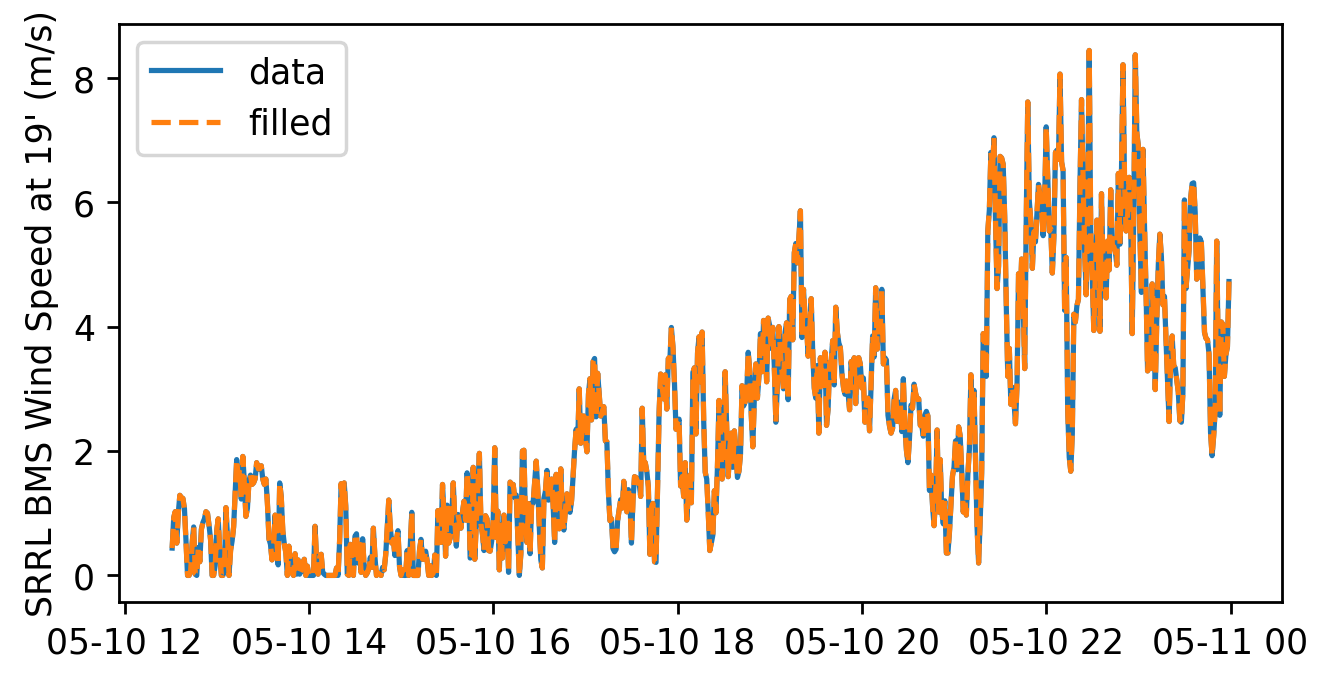

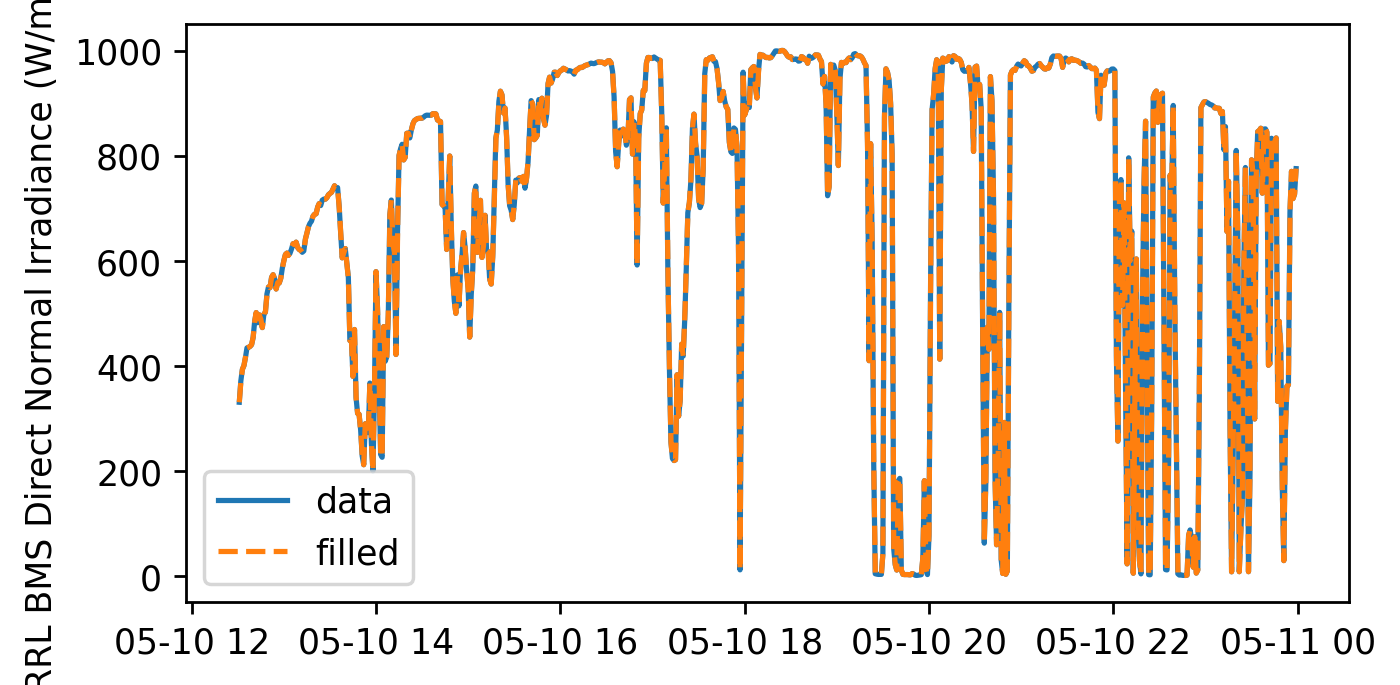

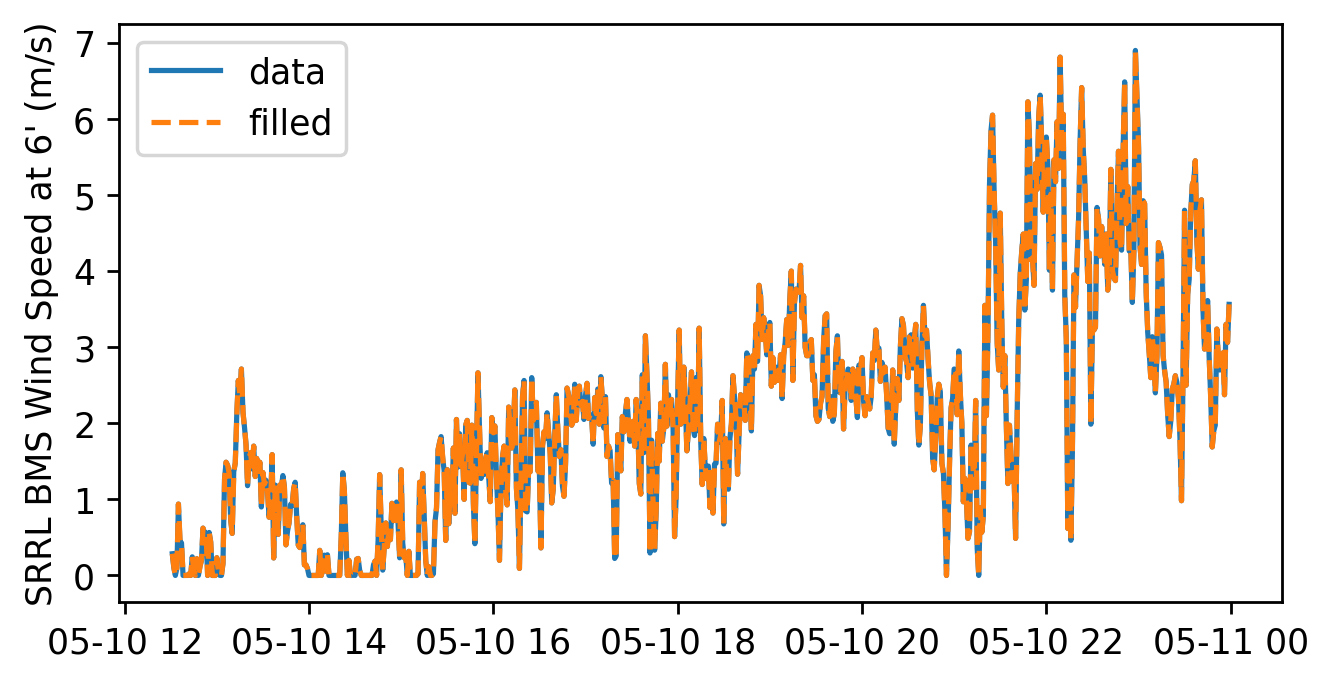

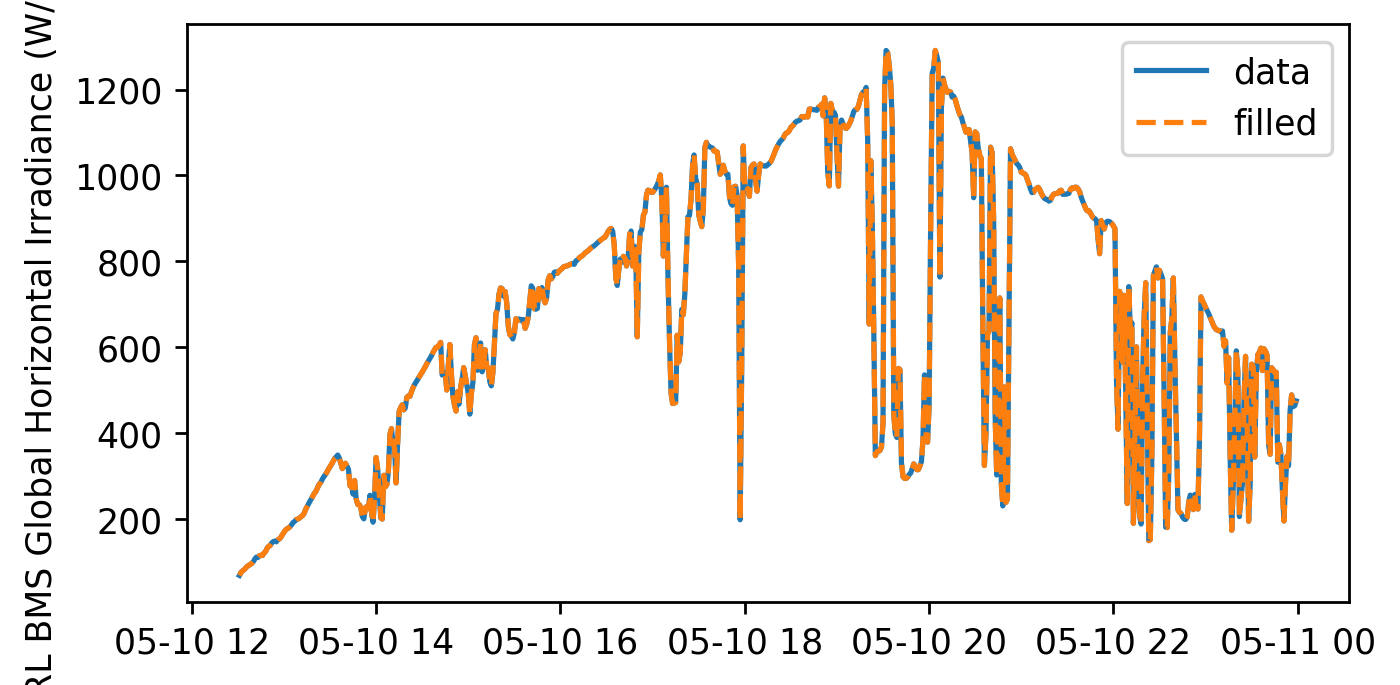

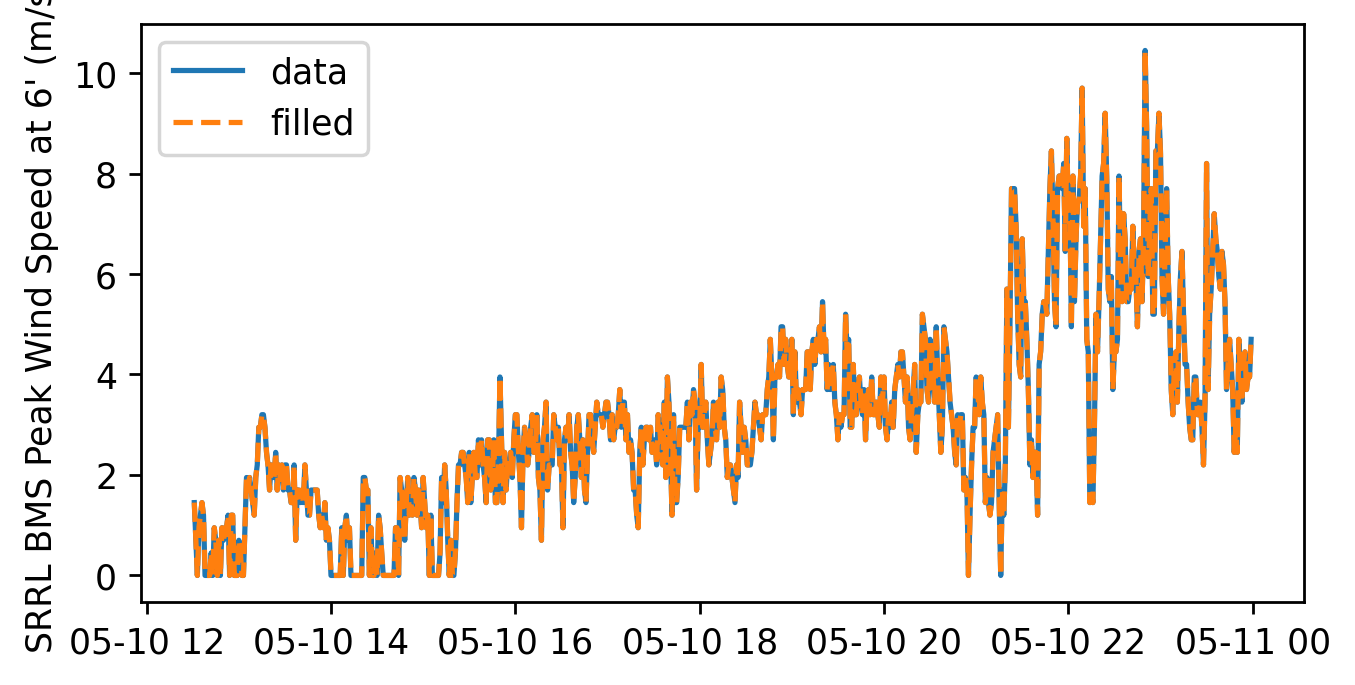

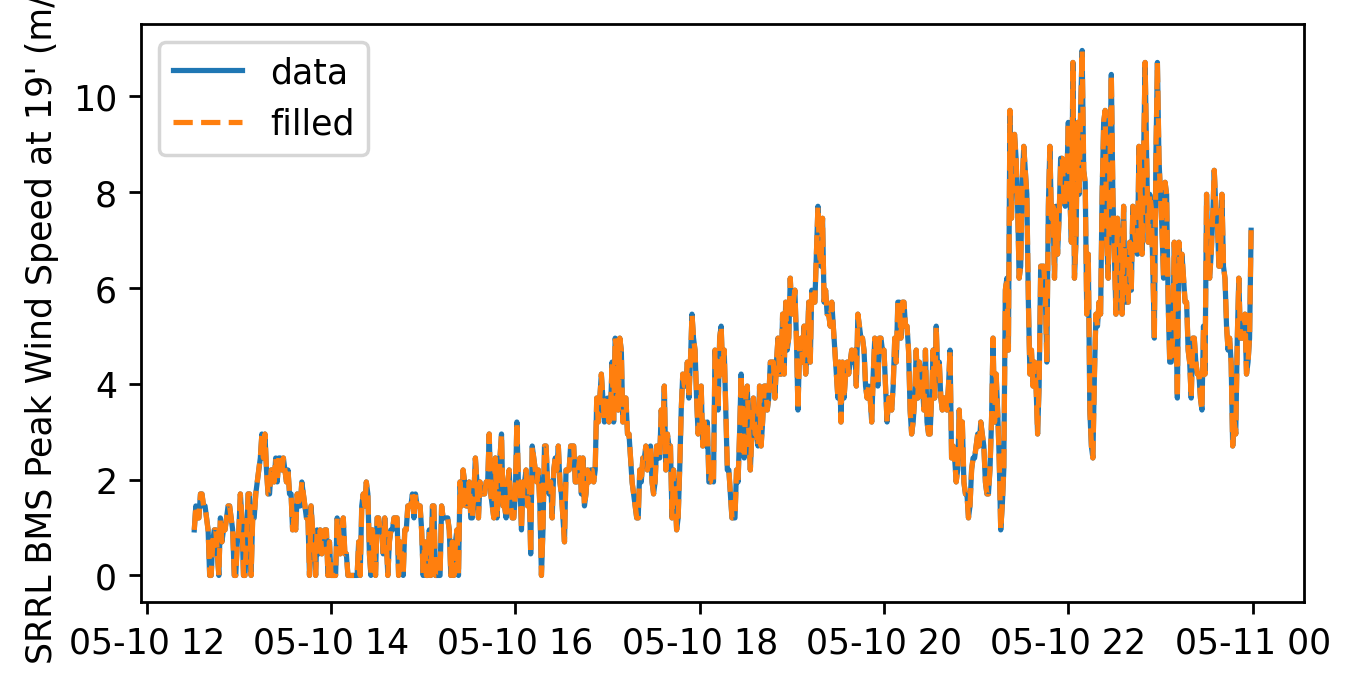

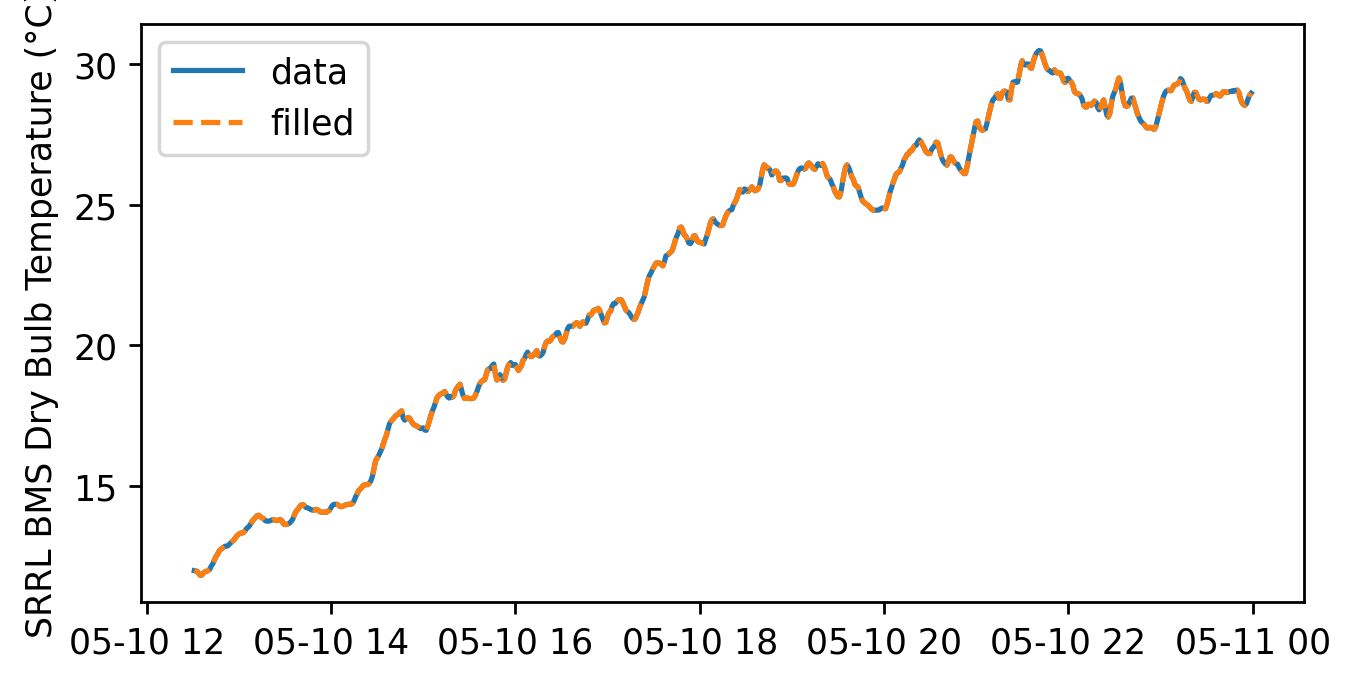

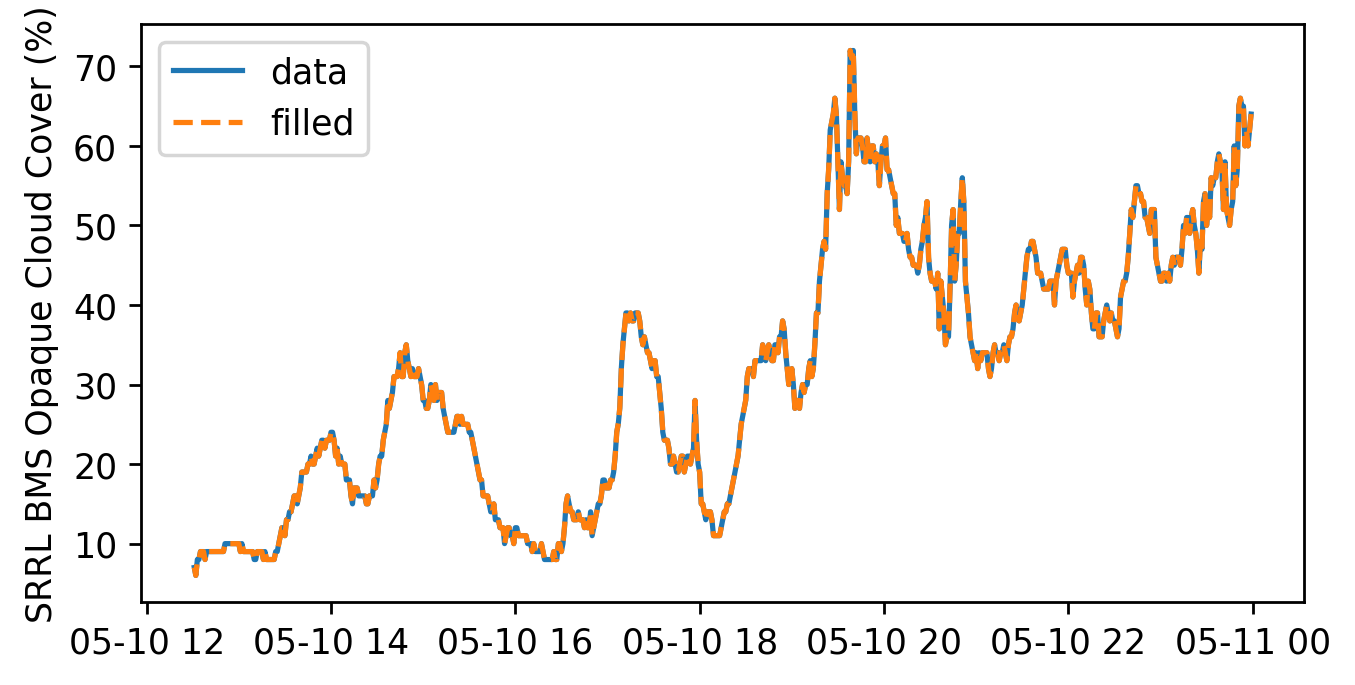

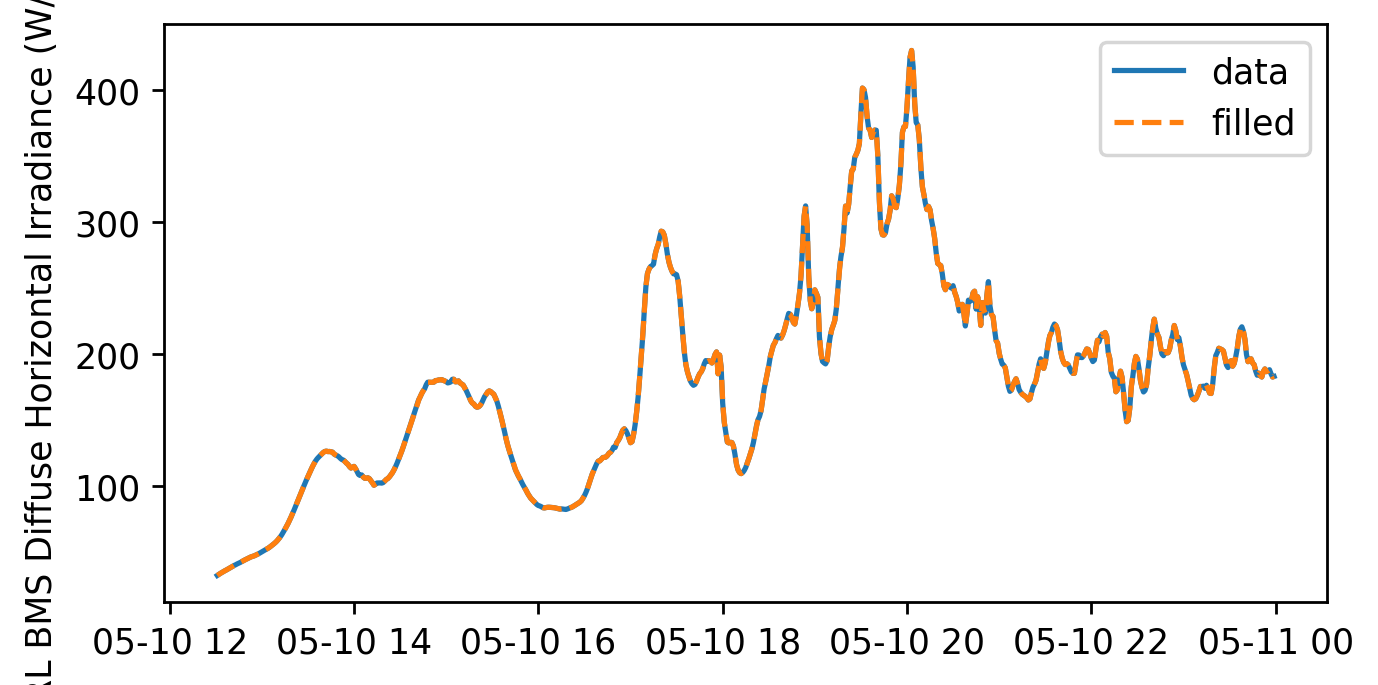

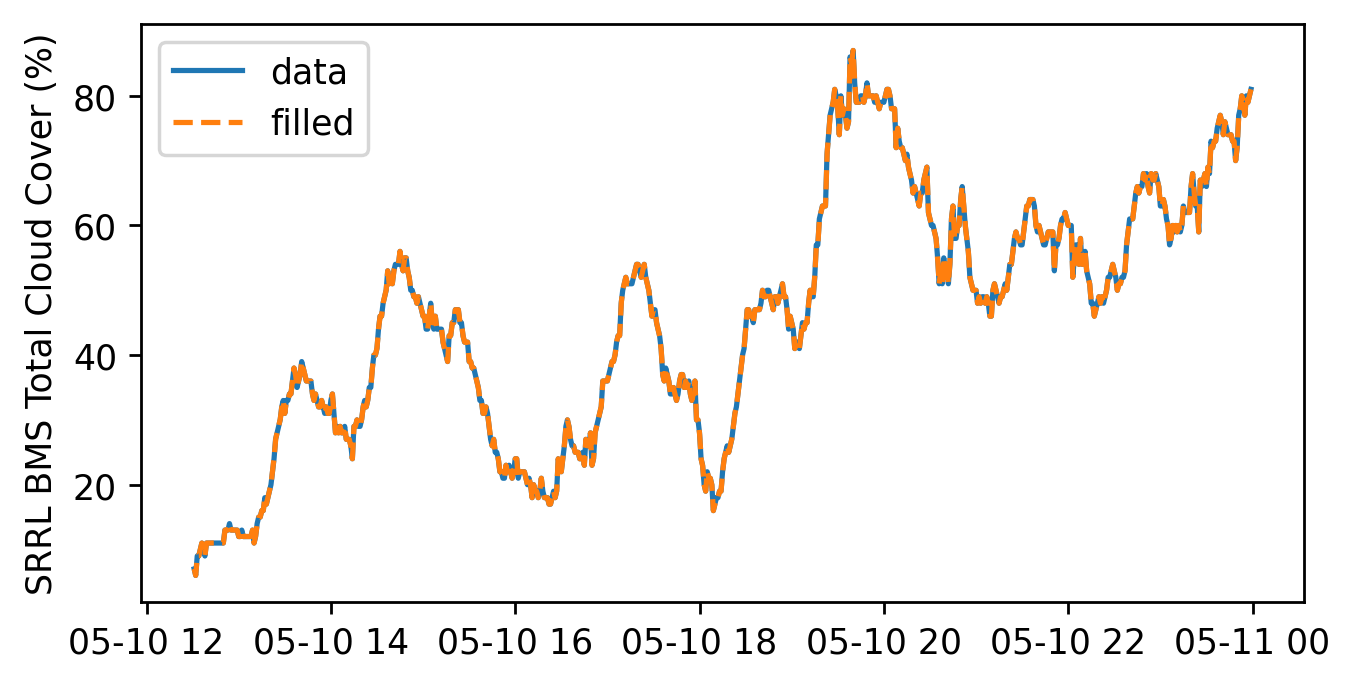

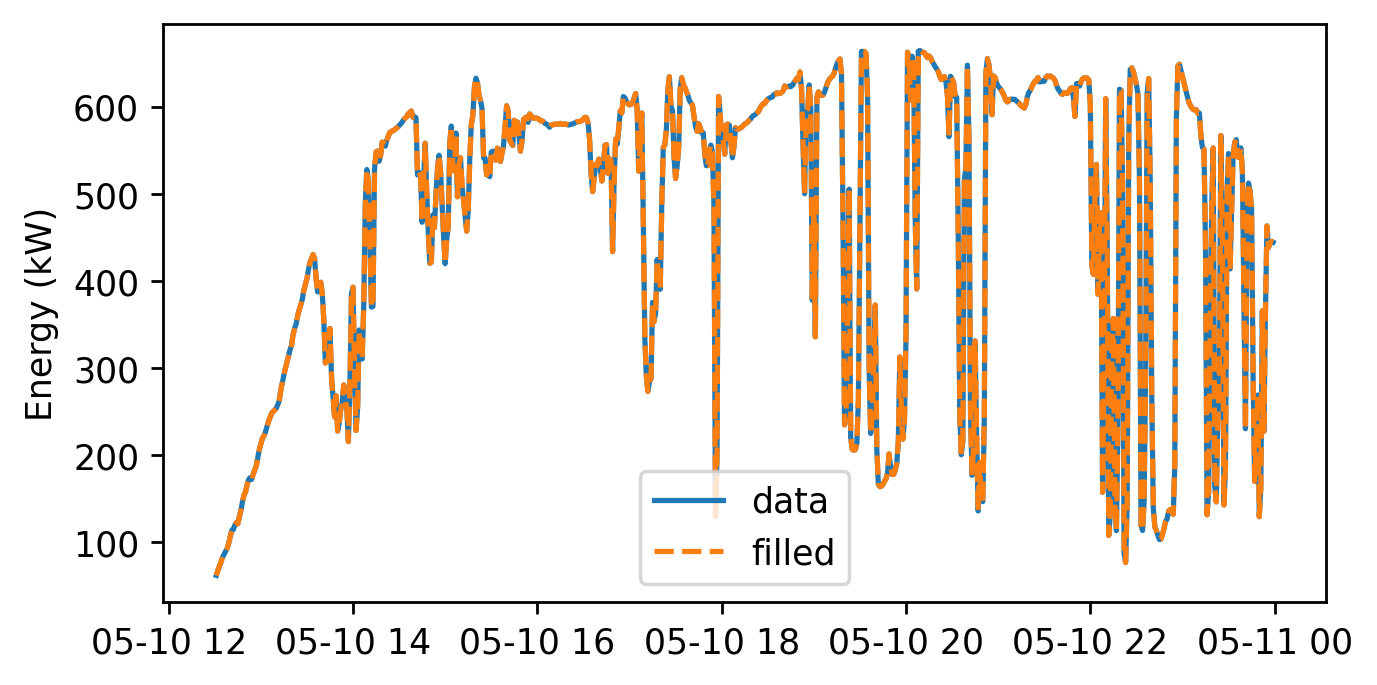

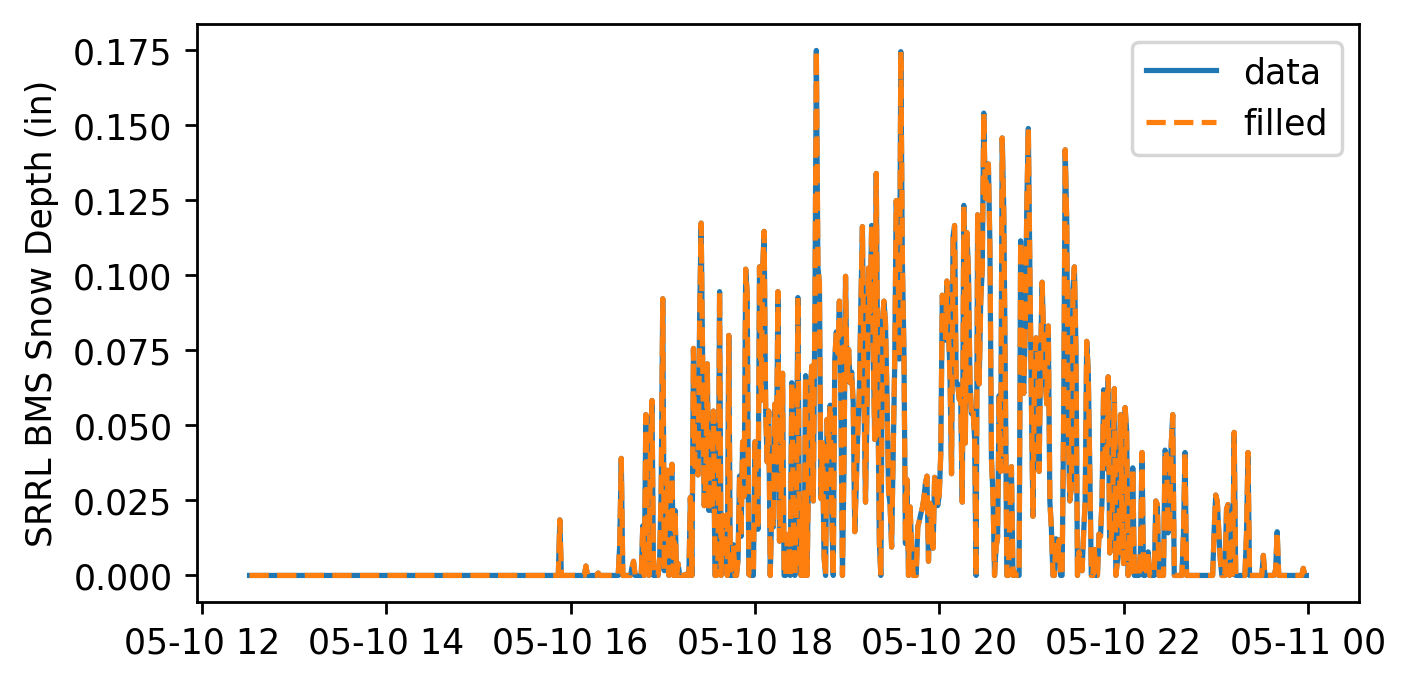

In [36]:
# data['SRRL BMS Direct Normal Irradiance (W/m²_irr)'].plot()
# data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'].plot(style='.-')
# plt.legend(["data", "resampled"])
# plt.ylabel("Energy (kW)")

for col in data.columns:
    fig, ax = plt.subplots(figsize=[6,3], dpi=250)
    ax.plot(data[col],'-', label='data')
    # ax.plot(data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],'.', label='resampled')
    ax.plot(data_resampled_filled[col],'--', label='filled')
    ax.set_ylabel(col)
    ax.legend()

In [24]:
# data = data_resampled_filled
data = test_data_interp

weather_data = np.array([
    data.index.year,
    data.index.month,
    data.index.day,
    data.index.hour,
    data.index.minute,
    data['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],
    data['SRRL BMS Diffuse Horizontal Irradiance (W/m²_irr)'],
    data['SRRL BMS Global Horizontal Irradiance (W/m²_irr)'],
    data["SRRL BMS Wind Speed at 19' (m/s)"],
    data['SRRL BMS Dry Bulb Temperature (°C)']
])

### Set model parameters

In [25]:
sys_design = {
    "ModelParams": {
        "SystemDesign": {
            "array_type": 2.0,
            "azimuth": 180.0,
            "dc_ac_ratio": 1.08,
            "gcr": 0.592,
            "inv_eff": 97.5,
            "losses": 15.53,
            "module_type": 2.0,
            "system_capacity": 720,
            "tilt": 0.0
        },
        "SolarResource": {
        }
    },
    "Other": {
        "lat": 39.7442,
        "lon": -105.1778,
        "elev": 1829
    }
}
    
model_params = sys_design['ModelParams']
elev = sys_design['Other']['elev']
lat = sys_design['Other']['lat']
lon = sys_design['Other']['lon']
tz = data.index[0].utcoffset().total_seconds()/60/60

### Make predictions

In [26]:
system_model = pvwatts.new()
system_model.assign(model_params)

solar_resource_data = {
        'tz': tz, # timezone
        'elev': elev, # elevation
        'lat': lat, # latitude
        'lon': lon, # longitude
        'year': tuple(weather_data[0]), # year
        'month': tuple(weather_data[1]), # month
        'day': tuple(weather_data[2]), # day
        'hour': tuple(weather_data[3]), # hour
        'minute': tuple(weather_data[4]), # minute
        'dn': tuple(weather_data[5]), # direct normal irradiance
        'df': tuple(weather_data[6]), # diffuse irradiance
        'gh': tuple(weather_data[7]), # global horizontal irradiance
        'wspd': tuple(weather_data[8]), # windspeed
        'tdry': tuple(weather_data[9]) # dry bulb temperature
        }

system_model.SolarResource.assign({'solar_resource_data': solar_resource_data})
system_model.AdjustmentFactors.assign({'constant': 0})

system_model.execute()
out = system_model.Outputs.export()

ac = np.array(out['ac']) / 1000
dc = np.array(out['dc']) / 1000

predictions = pd.DataFrame({"ac": ac, "dc": dc, "aoi": np.array(out['aoi'])}, columns = ['ac','dc','aoi'])
predictions = predictions.set_index(data.index.copy())        

Text(0, 0.5, 'Energy (kW)')

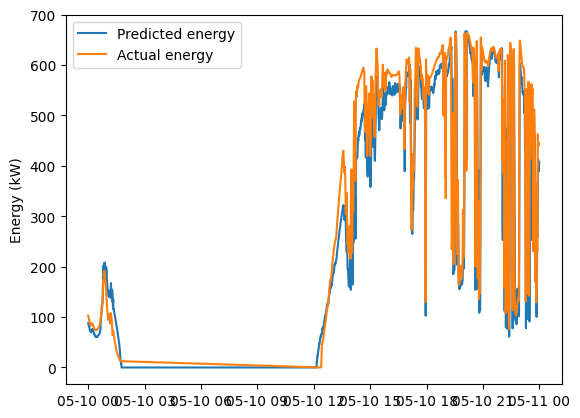

In [27]:
fig, ax = plt.subplots()
ax.plot(predictions['ac'],'-', label='Predicted energy')
ax.plot(data['Energy (kW)'],'-', label='Actual energy')
ax.legend()
plt.ylabel("Energy (kW)")

Text(0, 0.5, 'Angle of Incidence')

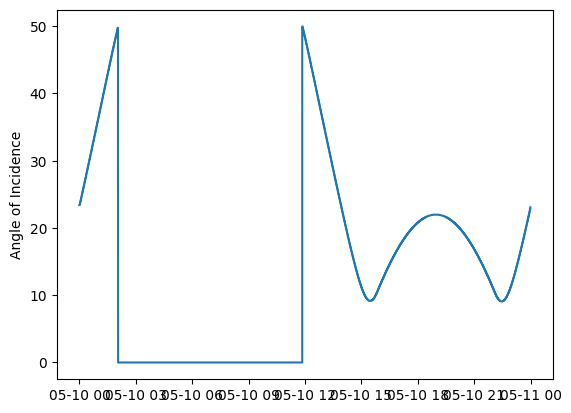

In [28]:
fig, ax = plt.subplots()
ax.plot(predictions['aoi'])
plt.ylabel("Angle of Incidence")

Looks good so let's save the interpolated data as a csv

In [38]:
data.to_csv('NonAnnualSimulation-sample_data-interpolated.csv')
data_resampled_filled.to_csv('NonAnnualSimulation-sample_data-interpolated-daytime.csv')

In [18]:
test_data_interp = pd.read_csv("NonAnnualSimulation-sample_data-interpolated.csv")
test_data_interp["Timestamp"] = pd.DatetimeIndex(pd.to_datetime(test_data_interp["Timestamp"], format='ISO8601', utc=True))
test_data_interp = test_data_interp.set_index("Timestamp")
test_data_interp.head()

SRRL BMS Wind Speed at 19' (m/s)  \
Timestamp                                                            
2018-05-10 00:00:00+00:00                                 1.100001   
2018-05-10 00:00:00.500000+00:00                          1.102817   
2018-05-10 00:00:01+00:00                                 1.105634   
2018-05-10 00:00:01.500000+00:00                          1.108451   
2018-05-10 00:00:02+00:00                                 1.111267   

                                  SRRL BMS Direct Normal Irradiance (W/m²_irr)  \
Timestamp                                                                        
2018-05-10 00:00:00+00:00                                             7.133315   
2018-05-10 00:00:00.500000+00:00                                      7.128695   
2018-05-10 00:00:01+00:00                                             7.124076   
2018-05-10 00:00:01.500000+00:00                                      7.119456   
2018-05-10 00:00:02+00:00                                             7.114837   

                                  SRRL BMS Wind Speed at 6' (m/s)  \
Timestamp                                                           
2018-05-10 00:00:00+00:00                                  0.5170   
2018-05-10 00:00:00.500000+00:00                           0.5138   
2018-05-10 00:00:01+00:00                                  0.5106   
2018-05-10 00:00:01.500000+00:00                           0.5074   
2018-05-10 00:00:02+00:00                                  0.5042   

                                  SRRL BMS Global Horizontal Irradiance (W/m²_irr)  \
Timestamp                                                                            
2018-05-10 00:00:00+00:00                                               170.042892   
2018-05-10 00:00:00.500000+00:00                                        170.007345   
2018-05-10 00:00:01+00:00                                               169.971798   
2018-05-10 00:00:01.500000+00:00                                        169.936250   
2018-05-10 00:00:02+00:00                                               169.900703   

                                  SRRL BMS Peak Wind Speed at 6' (m/s)  \
Timestamp                                                                
2018-05-10 00:00:00+00:00                                     0.950001   
2018-05-10 00:00:00.500000+00:00                              0.954167   
2018-05-10 00:00:01+00:00                                     0.958334   
2018-05-10 00:00:01.500000+00:00                              0.962501   
2018-05-10 00:00:02+00:00                                     0.966667   

                                  SRRL BMS Peak Wind Speed at 19' (m/s)  \
Timestamp                                                                 
2018-05-10 00:00:00+00:00                                      1.450001   
2018-05-10 00:00:00.500000+00:00                               1.456251   
2018-05-10 00:00:01+00:00                                      1.462501   
2018-05-10 00:00:01.500000+00:00                               1.468751   
2018-05-10 00:00:02+00:00                                      1.475001   

                                  SRRL BMS Dry Bulb Temperature (°C)  \
Timestamp                                                              
2018-05-10 00:00:00+00:00                                  21.250000   
2018-05-10 00:00:00.500000+00:00                           21.249917   
2018-05-10 00:00:01+00:00                                  21.249833   
2018-05-10 00:00:01.500000+00:00                           21.249750   
2018-05-10 00:00:02+00:00                                  21.249667   

                                  SRRL BMS Opaque Cloud Cover (%)  \
Timestamp                                                           
2018-05-10 00:00:00+00:00                               86.000000   
2018-05-10 00:00:00.500000+00:00                        85.991667   
2018-05-10 00:00:01+00:00                              

In [23]:
test_data_interp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172681 entries, 2018-05-10 00:00:00+00:00 to 2018-05-10 23:59:00+00:00
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SRRL BMS Wind Speed at 19' (m/s)                   172681 non-null  float64
 1   SRRL BMS Direct Normal Irradiance (W/m²_irr)       172681 non-null  float64
 2   SRRL BMS Wind Speed at 6' (m/s)                    172681 non-null  float64
 3   SRRL BMS Global Horizontal Irradiance (W/m²_irr)   172681 non-null  float64
 4   SRRL BMS Peak Wind Speed at 6' (m/s)               172681 non-null  float64
 5   SRRL BMS Peak Wind Speed at 19' (m/s)              172681 non-null  float64
 6   SRRL BMS Dry Bulb Temperature (°C)                 172681 non-null  float64
 7   SRRL BMS Opaque Cloud Cover (%)                    172681 non-null  float64
 8   SRRL BMS Diffuse Horizontal 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 810 entries, 2018-05-10 00:00:00+00:00 to 2018-05-10 23:59:00+00:00
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   SRRL BMS Wind Speed at 19' (m/s)                   810 non-null    float64
 1   SRRL BMS Direct Normal Irradiance (W/m²_irr)       810 non-null    float64
 2   SRRL BMS Wind Speed at 6' (m/s)                    810 non-null    float64
 3   SRRL BMS Global Horizontal Irradiance (W/m²_irr)   810 non-null    float64
 4   SRRL BMS Peak Wind Speed at 6' (m/s)               810 non-null    float64
 5   SRRL BMS Peak Wind Speed at 19' (m/s)              810 non-null    float64
 6   SRRL BMS Dry Bulb Temperature (°C)                 810 non-null    float64
 7   SRRL BMS Opaque Cloud Cover (%)                    810 non-null    float64
 8   SRRL BMS Diffuse Horizontal Irradiance (W

In [29]:
data.index[-1] - data.index[0]

Timedelta('0 days 23:59:00')

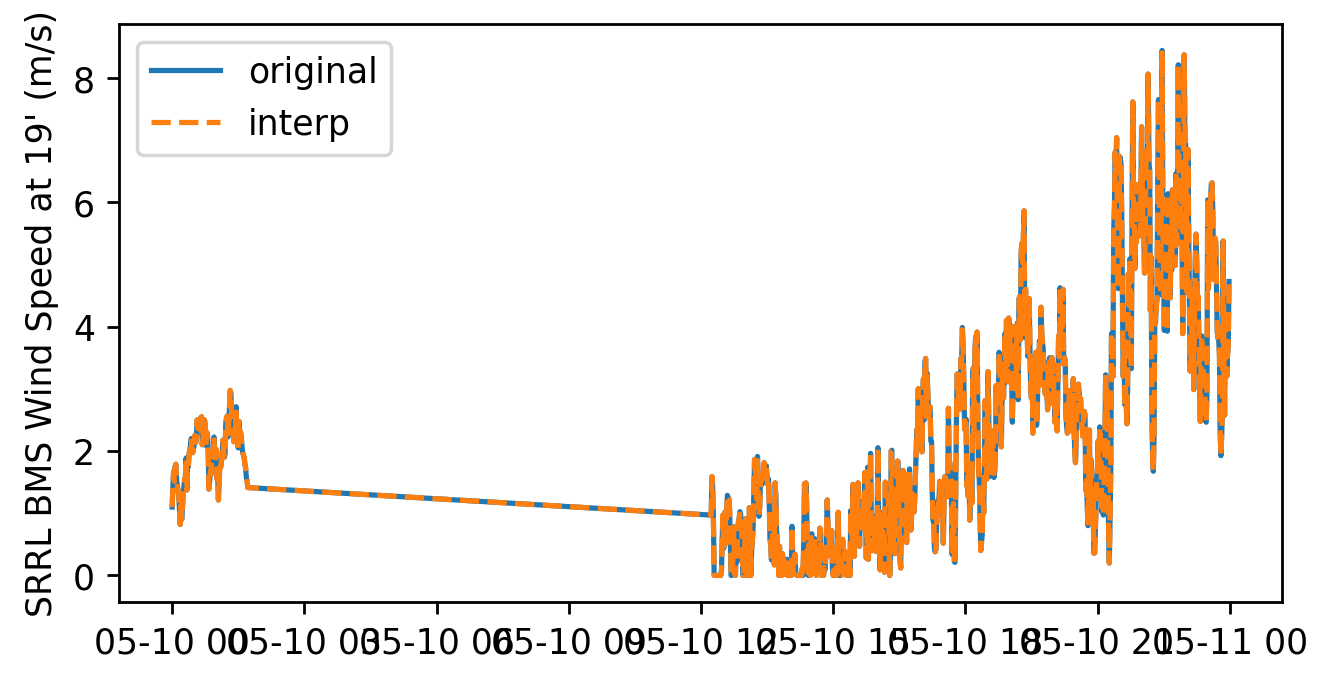

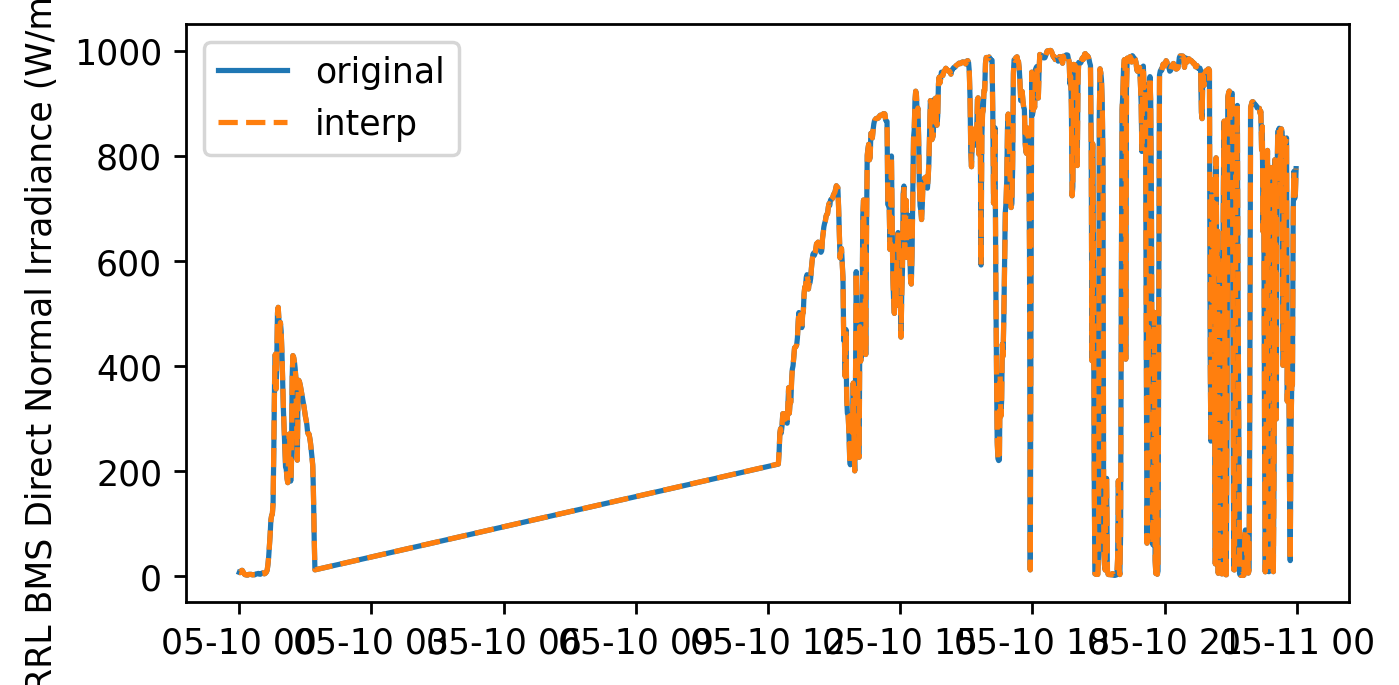

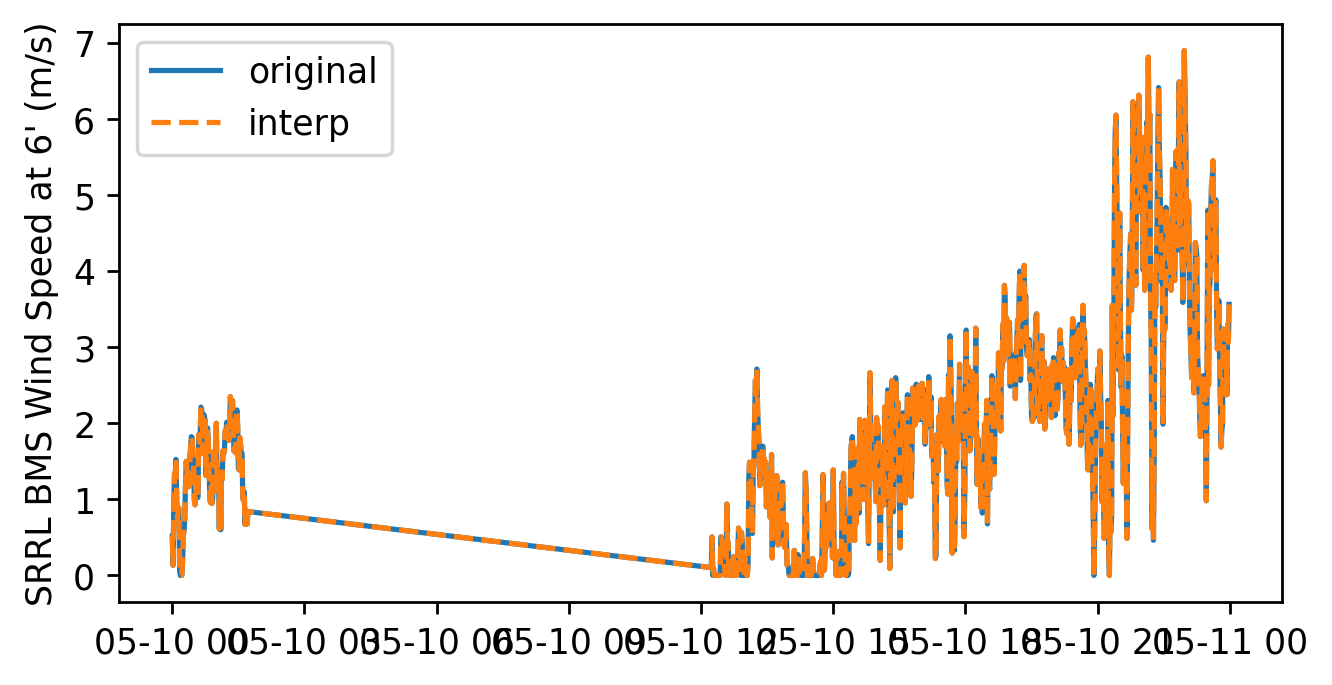

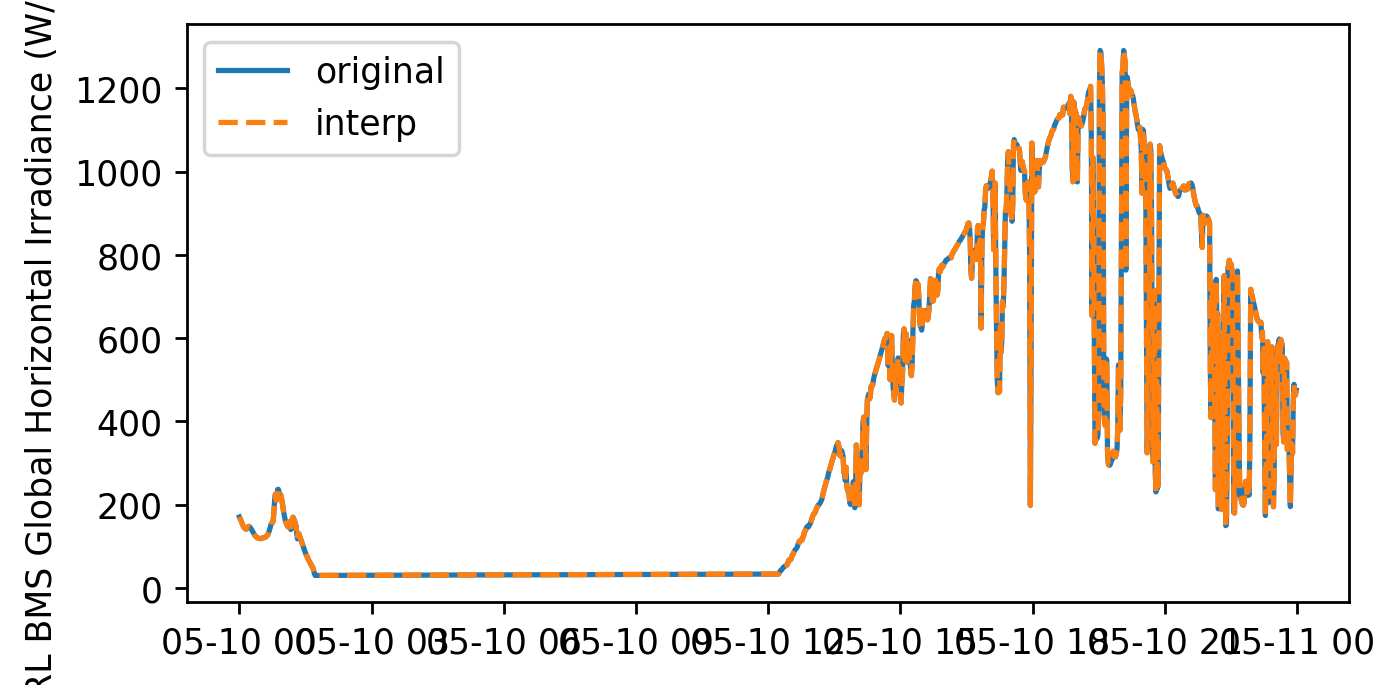

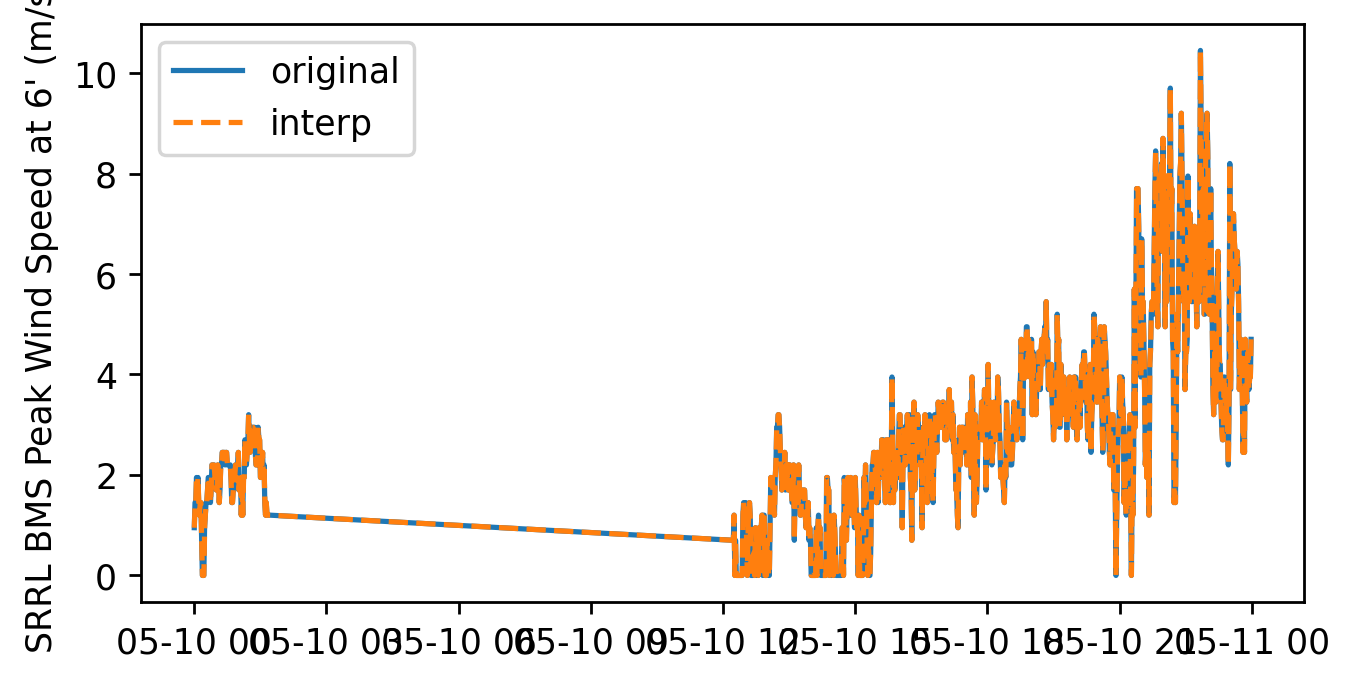

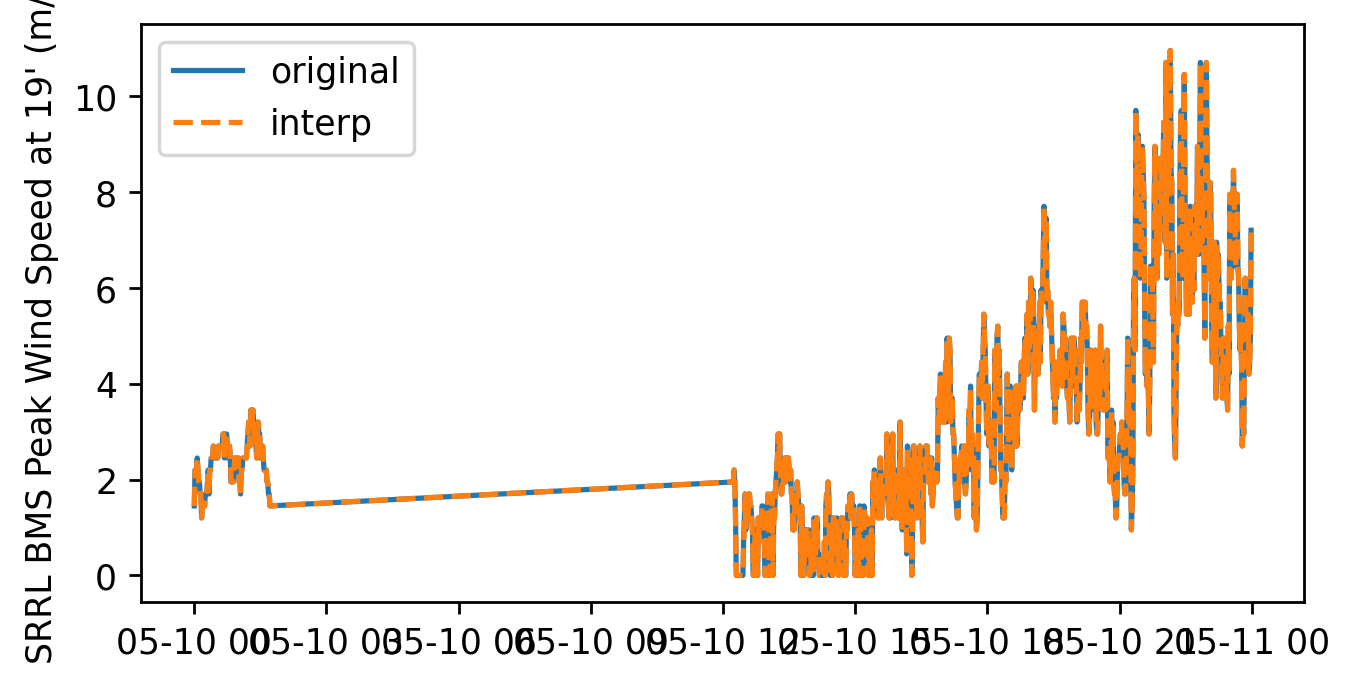

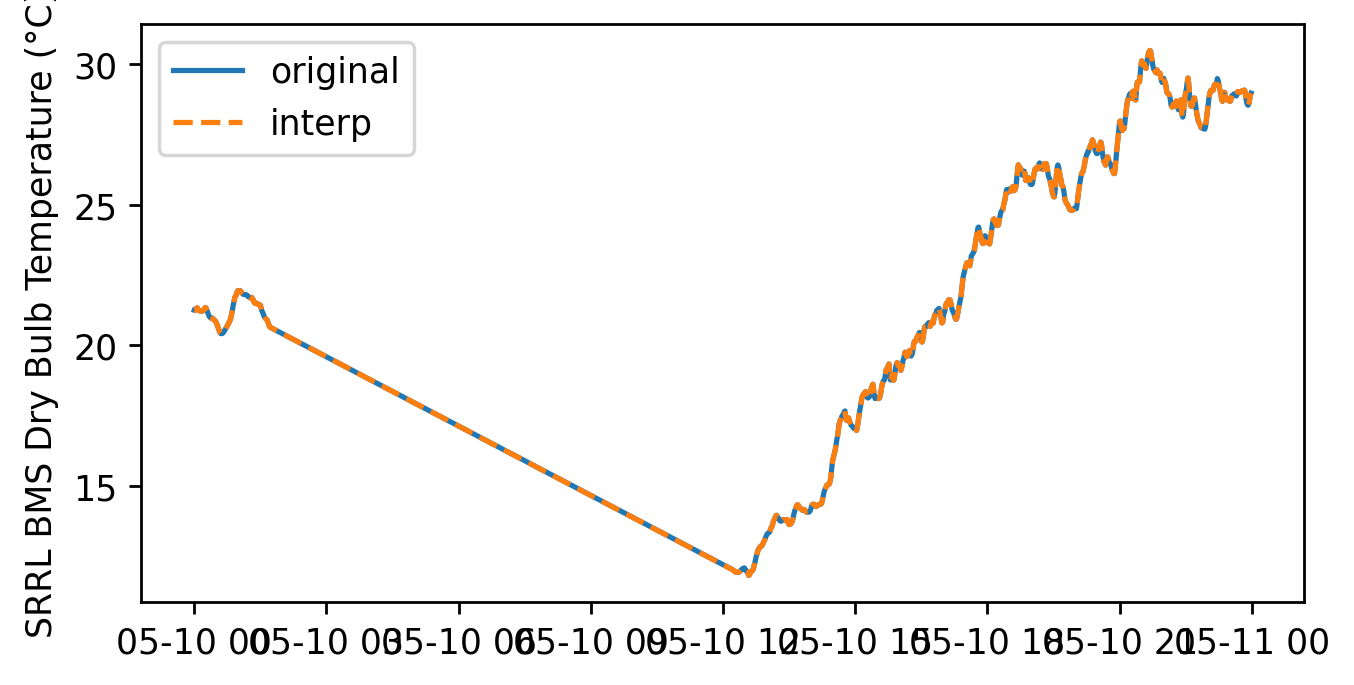

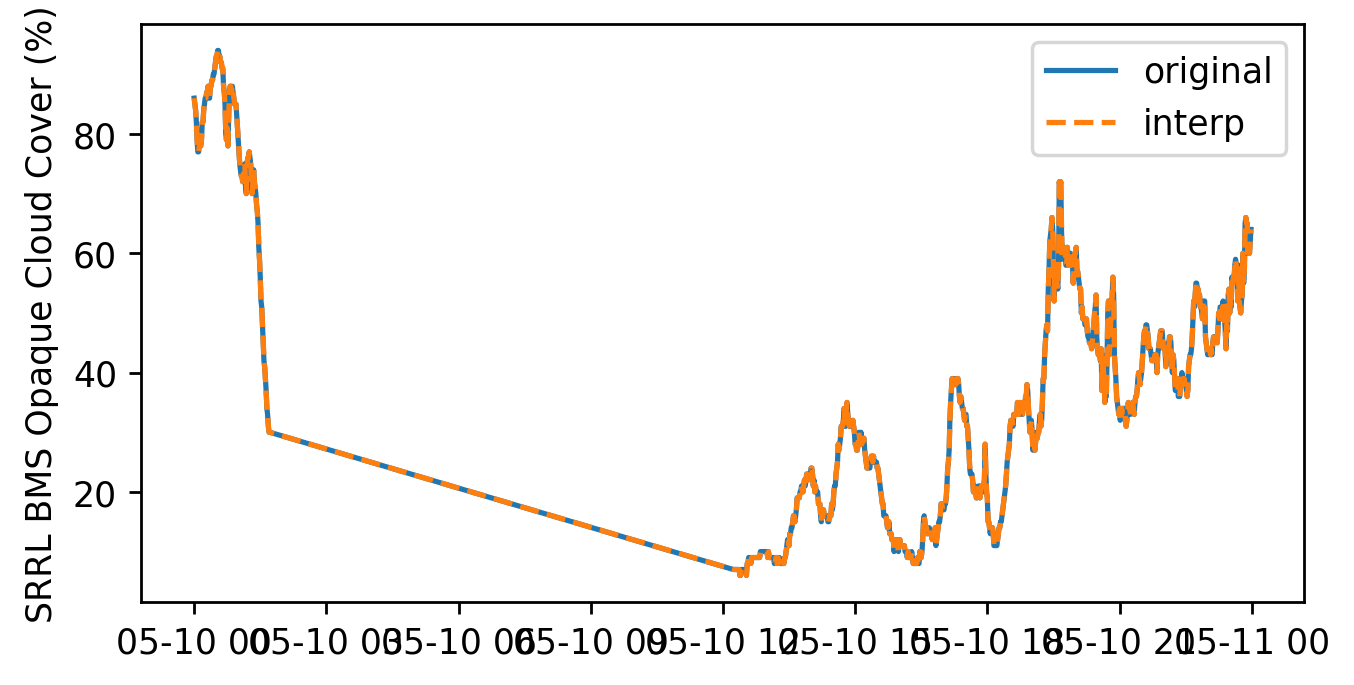

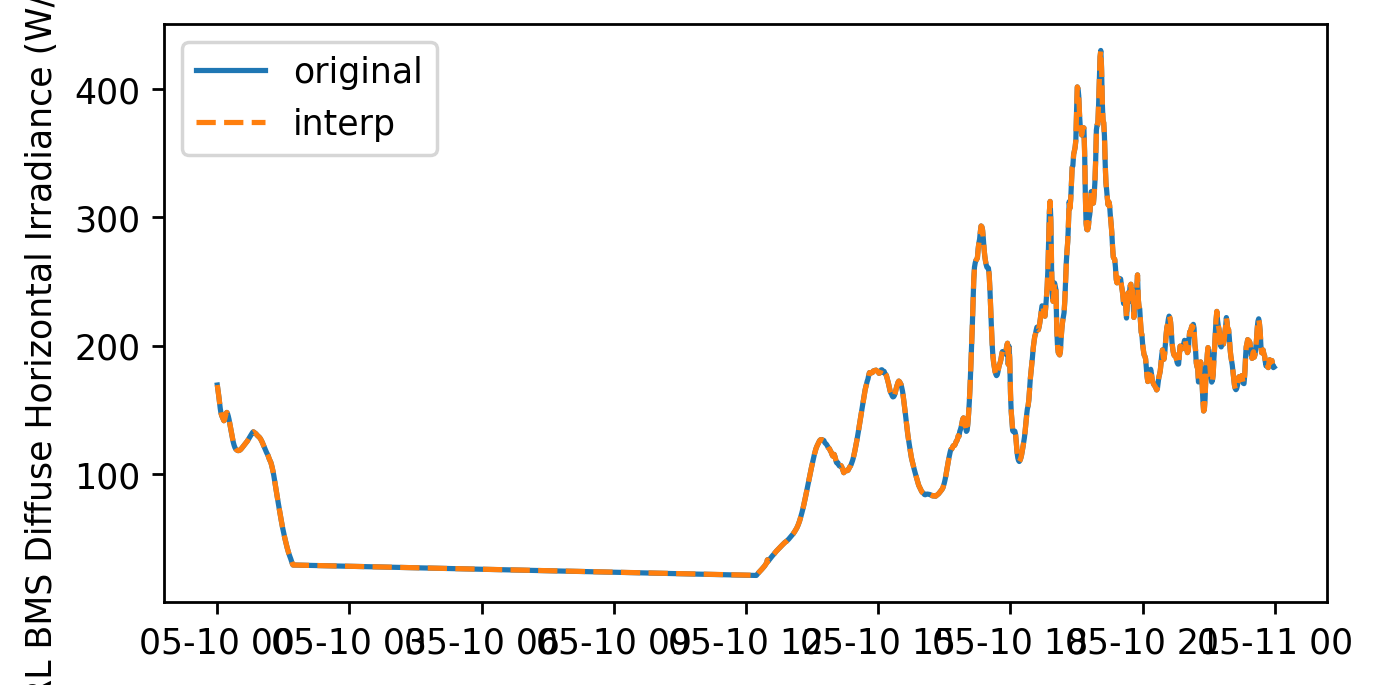

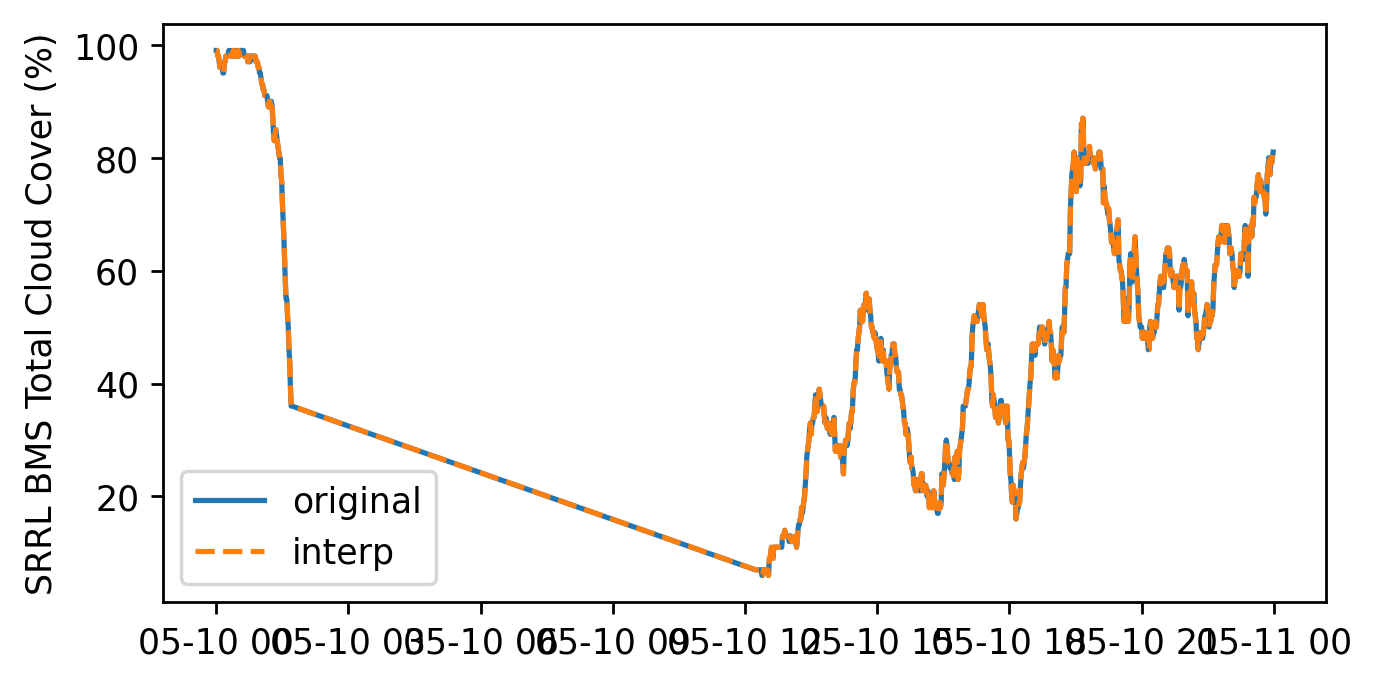

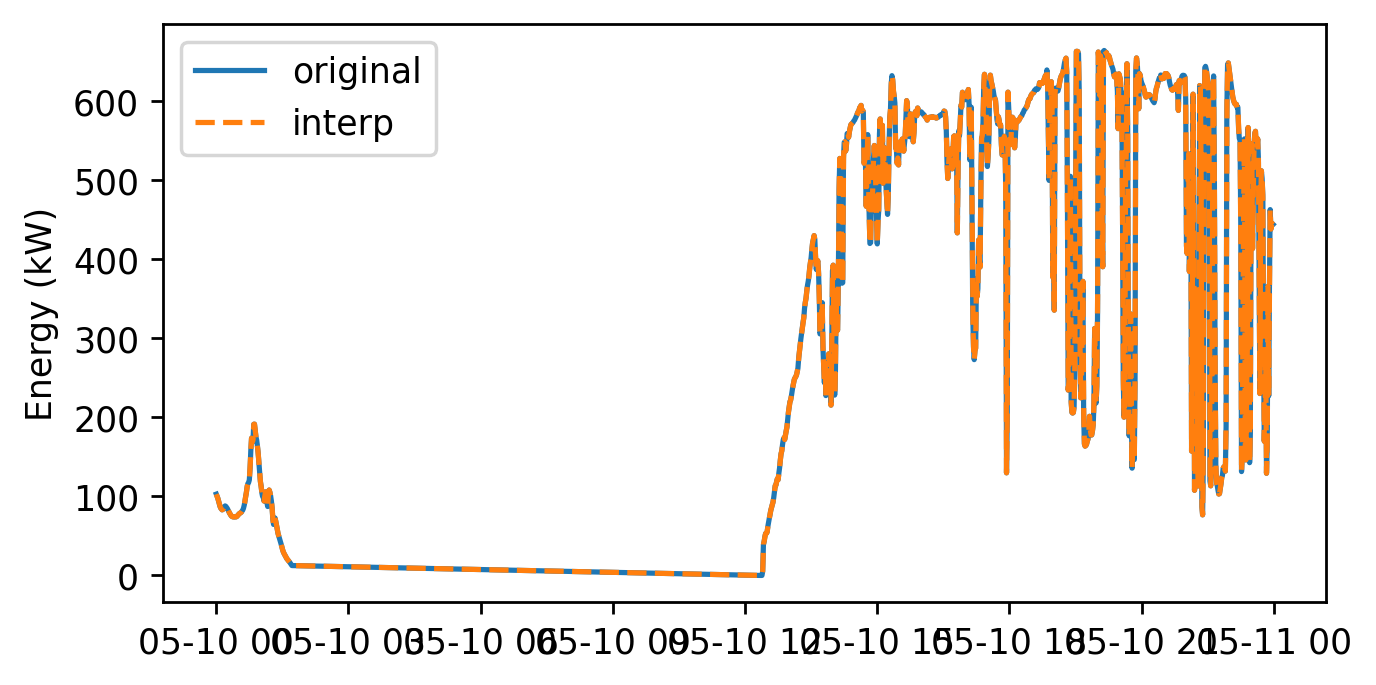

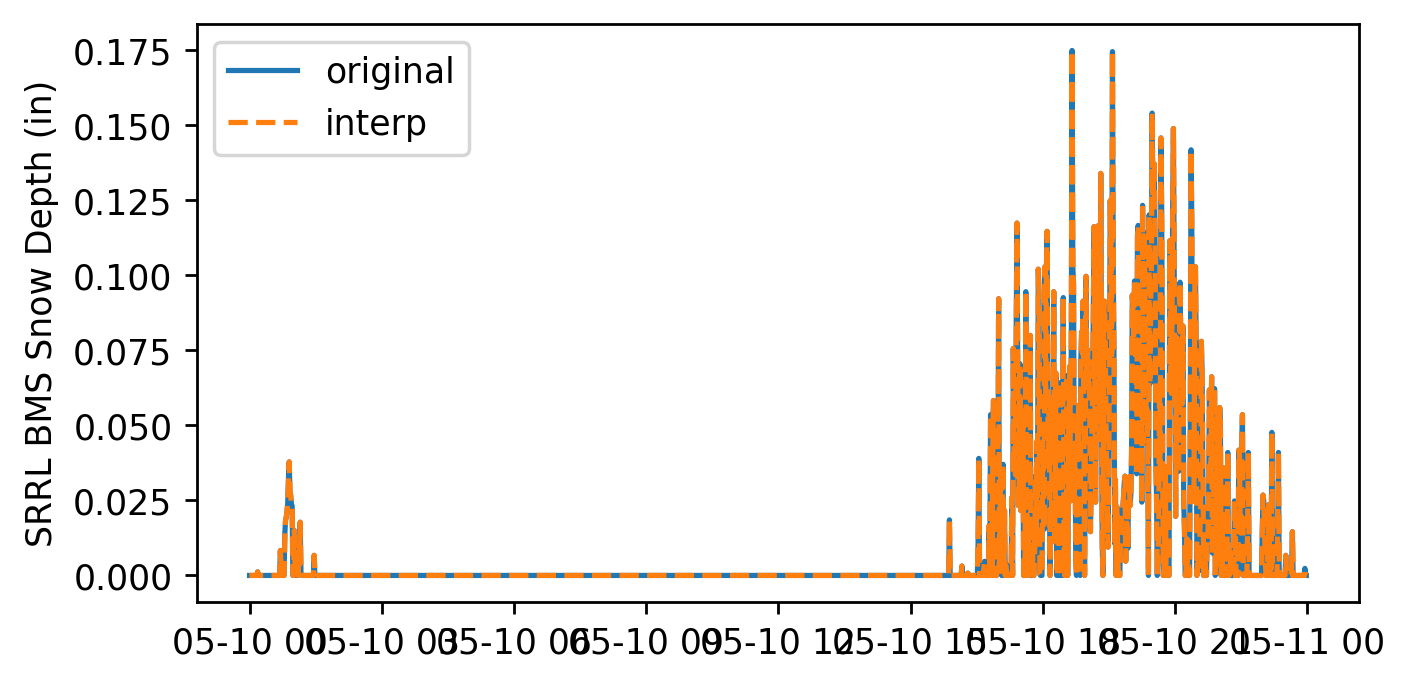

In [21]:
# plot original data vs interpolated data read in from csv
for col in data.columns:
    fig, ax = plt.subplots(figsize=[6,3], dpi=250)
    ax.plot(data[col],'-', label='original')
    # ax.plot(data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],'.', label='resampled')
    ax.plot(test_data_interp[col],'--', label='interp')
    ax.set_ylabel(col)
    ax.legend()